In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from statistics import mean
from collections import Counter

i = Image.open('images/numbers/y0.5.png')

iar = np.asarray(i)

plt.imshow(iar)
plt.show()

<Figure size 640x480 with 1 Axes>

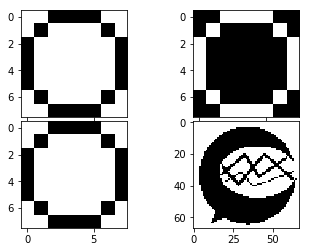

In [2]:
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    
    #gets average for each pixel
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = mean(eachPix[:3])
            balanceAr.append(avgNum)
    
    #changes the pixel according to the average(black or white)
    balance = mean(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if mean(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr        
    

#opening and converting images to pixel array
i = Image.open('images/numbers/0.1.png')
iar = np.array(i)
i2 = Image.open('images/numbers/y0.4.png')
iar2 = np.array(i2)
i3 = Image.open('images/numbers/y0.5.png')
iar3 = np.array(i3)
i4 = Image.open('images/sentdex.png')
iar4 = np.array(i4)

#calling the threshol function
threshold(iar)
threshold(iar2)
threshold(iar3)
threshold(iar4)

#plotting the view
fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=4, colspan=3)
ax2 = plt.subplot2grid((8,6),(4,0), rowspan=4, colspan=3)
ax3 = plt.subplot2grid((8,6),(0,3), rowspan=4, colspan=3)
ax4 = plt.subplot2grid((8,6),(4,3), rowspan=4, colspan=3)


ax1.imshow(iar)
ax2.imshow(iar2)
ax3.imshow(iar3)
ax4.imshow(iar4)


plt.show()

In [3]:
#Building examples model
#function to create arrays and save them
def createExamples():
    numberArrayExamples = open('numArEx.txt', 'a')
    numbersWeHave = range(0,10)
    versionsWeHave = range(1,10)
    #creating names and making a path to read each image
    for eachNum in numbersWeHave:
        for eachVer in versionsWeHave:
            imgFilePath = 'images/numbers/'+str(eachNum)+'.'+str(eachVer)+'.png'
            
            # opened image gets put into a list
            ei = Image.open(imgFilePath)
            eiar = np.array(ei)
            eiar1 = str(eiar.tolist())
            
            #saving into the txt file
            lineToWrite = str(eachNum)+'::'+eiar1+'\n'
            numberArrayExamples.write(lineToWrite)
            
createExamples()            
            

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

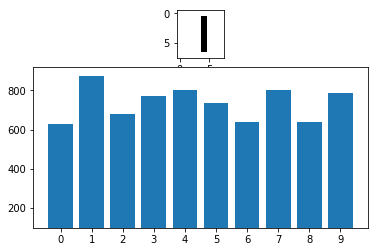

In [4]:
#Taking current image and comparing it to a database file (eg, numArEx.txt)

def whatNum(filePath):
    matchedAr = []
    loadExamps = open('numArEx.txt', 'r').read()
    loadExamps = loadExamps.split('\n')
    
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()
    
    inQuestion = str(iarl)
    
    for eachExample in loadExamps:
        try:
            if len(eachExample) > 3:
                splitEx = eachExample.split('::')
                currentNum = splitEx[0]
                currentAr = splitEx[1]
            
                eachPixEx = currentAr.split('],')
            
                eachPixInQ = inQuestion.split('],')
            
                x = 0
                while x < len(eachPixEx):
                    if eachPixEx[x] == eachPixInQ[x]:
                        matchedAr.append(int(currentNum))
                        
                    x += 1
                    
        except Exception as e:
            print(str(e))
            
    print(matchedAr)
    x = Counter(matchedAr)
    print(x)
    
    #graphical representation
    graphX = []
    graphY = []
    
    yline = 0
    
    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])
        ylimi = x[eachThing]
        
        
    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3, colspan=4)
    
    ax1.imshow(iar)
    
    ax2.bar(graphX,graphY, align='center')
    
    plt.ylim(100)
    
    xloc = plt.MaxNLocator(12)
    
    ax2.xaxis.set_major_locator(xloc)
    
    plt.show()
whatNum('images/test.png')



